# Figures Generating for the Nuerical Examples

## Setting Up Parameters

In [2]:
from qutip import *
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:

#Nuclear Spins
N = 3
spin = 1

Ix, Iy, Iz = sigmax()/2, sigmay()/2, sigmaz()/2 # 15N nuclear spins
iden = identity(2)

#Electron Spins
Sx, Sy, Sz = sigmax(), sigmay(), sigmaz()

#interaction operators x, y, z for omega, mu, z
SIxx = [tensor(Sx,Ix,iden,iden),tensor(Sx,iden,Ix,iden),tensor(Sx,iden,iden,Ix)]
SIyy = [tensor(Sy,Iy,iden,iden),tensor(Sy,iden,Iy,iden),tensor(Sy,iden,iden,Iy)]
SIzz = [tensor(Sz,Iz,iden,iden),tensor(Sz,iden,Iz,iden),tensor(Sz,iden,iden,Iz)]

SIxy = [tensor(Sx,Iy,iden,iden),tensor(Sx,iden,Iy,iden),tensor(Sx,iden,iden,Iy)]
SIxz = [tensor(Sx,Iz,iden,iden),tensor(Sx,iden,Iz,iden),tensor(Sx,iden,iden,Iz)]

SIyx = [tensor(Sy,Ix,iden,iden),tensor(Sy,iden,Ix,iden),tensor(Sy,iden,iden,Ix)]
SIyz = [tensor(Sy,Iz,iden,iden),tensor(Sy,iden,Iz,iden),tensor(Sy,iden,iden,Iz)]

SIzx = [tensor(Sz,Ix,iden,iden),tensor(Sz,iden,Ix,iden),tensor(Sz,iden,iden,Ix)]
SIzy = [tensor(Sz,Iy,iden,iden),tensor(Sz,iden,Iy,iden),tensor(Sz,iden,iden,Iy)]

#free operators
SSx = tensor(Sx,iden,iden,iden)
SSy = tensor(Sy,iden,iden,iden)
SSz = tensor(Sz,iden,iden,iden)

IIx = [tensor(iden,Ix,iden,iden),tensor(iden,iden,Ix,iden),tensor(iden,iden,iden,Ix)]
IIy = [tensor(iden,Iy,iden,iden),tensor(iden,iden,Iy,iden),tensor(iden,iden,iden,Iy)]
IIz = [tensor(iden,Iz,iden,iden),tensor(iden,iden,Iz,iden),tensor(iden,iden,iden,Iz)]

Iden = tensor(iden,iden,iden,iden)
d = Iden.tr()

proj_0 = tensor(fock_dm(2,0),iden,iden,iden)
proj_1 = tensor(fock_dm(2,1),iden,iden,iden)

In [4]:
# zero field splitting
Dzfs = 2*np.pi*3.472e9

# gyromagnetic ratios
gammae = 2*np.pi*2.79925e10
gammaN = 2*np.pi*4.32e6

# Fermi contact hyperfine coupling of 15N
# Ahf_xx = 2*np.pi*np.array([ 113.740773,  68.59693 , 113.740778])*1e6
# Ahf_yy = 2*np.pi*np.array([ 83.6449  , 128.788676,  83.644905])*1e6
# Ahf_zz = 2*np.pi*np.array([ 70.20792 , 70.207916, 70.20792])*1e6
# Ahf_xy = 2*np.pi*np.array([ 26.063791, 0.000, -26.063791])*1e6

#diagonalized to their axes, z pointing in local principal axes
Ahf_zz = 2*np.pi*np.array([ 128.788710, 128.788676,  128.788710])*1e6
Ahf_perp = 2*np.pi*np.array([ 68.59696,  68.59693 , 68.59696])*1e6
# Ahf_zz = 2*np.pi*np.array([ 70.20792 , 70.207916, 70.20792])*1e6  we don't use the parallel component in the c-axis in this work

# Normalization
units = 2*np.pi*1e9 # 2π GHz

De = Dzfs/units
ge = gammae/units
gN = gammaN/units

Azz = Ahf_zz/units
Aperp = Ahf_perp/units

AA = [Azz, Aperp]

theta = np.array([2*(k-1)*np.pi/3 for k in range(3)])

In [5]:
def a_k_vect(B0, phi, k): # 2π GHz
    omega_e = ge*B0
    omega_del = np.sqrt(De**2 + 4*omega_e**2)
    
    a_vect = np.array([((2*omega_e/omega_del)*Azz[k])*np.cos(-phi - theta[k]), ((2*omega_e/omega_del)*Aperp[k])*np.sin(-phi - theta[k])])
    return a_vect

def a_k(B0, phi, k): # 2π GHz
    return np.linalg.norm(a_k_vect(B0, phi, k))

def c_k_vect(B0, phi, k): # 2π GHz
    omega_e = ge*B0
    omega_del = np.sqrt(De**2 + 4*omega_e**2)
    omega_n = gN*B0

    a_vect = np.array([((2*omega_e/omega_del)*Azz[k]+omega_n)*np.cos(-phi - theta[k]), ((2*omega_e/omega_del)*Aperp[k]-omega_n)*np.sin(-phi - theta[k])])
    a = np.linalg.norm(a_vect)
    c_vect = np.array([((De/omega_del)*Azz[k])*np.cos(-phi - theta[k]), ((De/omega_del)*Aperp[k])*np.sin(-phi - theta[k])])

    return (c_vect[0]*a_vect[0] + c_vect[1]*a_vect[1])/a, (c_vect[0]*a_vect[1] - c_vect[1]*a_vect[0])/a 


In [6]:
B0 = 0.25
phi = np.pi/4.5

a_klist = np.array([a_k(B0, phi, k) for k in range(3)])
a_klist_perp = a_klist*np.sin(-phi-theta)
a_klist_par = a_klist*np.cos(-phi-theta)
c_klist = np.array([np.linalg.norm(c_k_vect(B0, phi, k)) for k in range(3)])

omega_e = ge*B0
omega_del = np.sqrt(De**2 + 4*omega_e**2)

omega_n = gN*B0
omega_n_par_1 = omega_n*np.cos(-phi-theta) 
omega_n_perp_1 = omega_n*np.sin(-phi-theta)  

omega_n_par = np.array([ omega_n_par_1[k]*a_k_vect(B0, phi, k)[0] + omega_n_perp_1[k]*a_k_vect(B0, phi, k)[1]  for k in range(3)])/a_klist
omega_n_perp = np.array([ omega_n_perp_1[k]*a_k_vect(B0, phi, k)[0] - omega_n_par_1[k]*a_k_vect(B0, phi, k)[1]  for k in range(3)])/a_klist


print('B = ', B0, 'T')
print('phi = π/', np.pi/phi)
print('a_k =', a_klist*1e3, '2π MHz')
print('1/a_k =', 1 / (a_klist*2*np.pi), 'ns')
print('c_k/omega_delta =', (c_klist/omega_del)*100, '%')
print('omega_n =', omega_n*1e3, '2π MHz')
print('1/omega_n =', 1e-3 / (omega_n * 2*np.pi), 'µs')
print('1/|omega_n_par| =', 1e-3 / (np.abs(omega_n_par) * 2*np.pi), 'µs')
print('1/|omega_n_perp| =', 1e-3 / (np.abs(omega_n_perp) * 2*np.pi), 'µs')
print('|omega_n_par/a_k| =', 100*np.abs(omega_n_par/a_klist), '%')
print('|omega_n_perp/a_k| =', 100*np.abs(omega_n_perp/a_klist), '%')

B =  0.25 T
phi = π/ 4.5
a_k = [ 69.06700929 104.88393857 119.64853145] 2π MHz
1/a_k = [2.30435551 1.51743866 1.33018718] ns
c_k/omega_delta = [0.11881176 0.18042544 0.20582406] %
omega_n = 1.08 2π MHz
1/omega_n = 0.14736568804805125 µs
1/|omega_n_par| = [0.14893204 0.15324221 0.14921444] µs
1/|omega_n_perp| = [1.01876948 0.53729713 0.93906756] µs
|omega_n_par/a_k| = [1.54725305 0.9902224  0.89146009] %
|omega_n_perp/a_k| = [0.22619008 0.28242076 0.14164979] %


## Loading the Preliminary Fidelity Landscape and Finding the Suitable $\tau$: Single-Qubit Case

In [7]:
# basic plotting parameters
w_max = np.max([np.max(np.abs(omega_n_par)), np.max(np.abs(omega_n_perp))]) # 2π GHz
w_min = np.min([np.min(np.abs(omega_n_par)), np.min(np.abs(omega_n_perp))]) # 2π GHz

T_ref = 1/(2*np.pi*w_min) #ns
M = 500
m_offset = 10
tlist = np.linspace(0, 1.5*T_ref, M+m_offset+1) 
taulist = np.linspace(0, 1.5*T_ref, M+m_offset+1)
taulist_cut = taulist[m_offset:]

# The landscapes generated are given as functions of fidelity type (4) x taulist_cut x tlist

In [8]:
# Here we load the fidelity landscapes of single-qubit gates
GateTypes = ['X', 'H', 'T', 'CX', 'CH', 'CT', 'Y', 'CY']
Sites = ['1', '2', '3']

import pickle
fidel_iden = pickle.load(open('fidelity landscape/fidel single/fidel_iden_diag','rb')) #this is the baseline given by the dephasing effect

fidelity_landscape = np.zeros(shape=[len(GateTypes), len(Sites), 4, len(taulist_cut), len(tlist)])

for g in range(len(GateTypes)):
    for k in range(len(Sites)):
        filename = r'fidelity landscape/fidel single/fidel_' + GateTypes[g] + '_diag_' + Sites[k]
        fidelity_landscape[g, k] = pickle.load(open(filename, 'rb'))


In [9]:
# collect the peaks
peaks_positions = np.zeros(shape=[len(GateTypes), len(Sites), 2])

ty_pick = 3 #pick the optima from the profiles in the original frame with decoherence

for gatetype in GateTypes:
    for site in Sites:
        g = GateTypes.index(gatetype)
        k = Sites.index(site)
        m_T_offset = M//10  # we don't want too small tau
        m_peak = np.where(fidelity_landscape[g, k, ty_pick,:,:]==np.max(fidelity_landscape[g, k, ty_pick, m_T_offset:,:]))
        peaks_positions[g, k][0], peaks_positions[g, k][1] = int(m_peak[0][0]), int(m_peak[1][0])    #take the first peak

The maximum fidelity of the gate  CY 2 is 0.9524419804116946 at tau =  203.7538969832979 ns, t= 209.74665865927724 ns


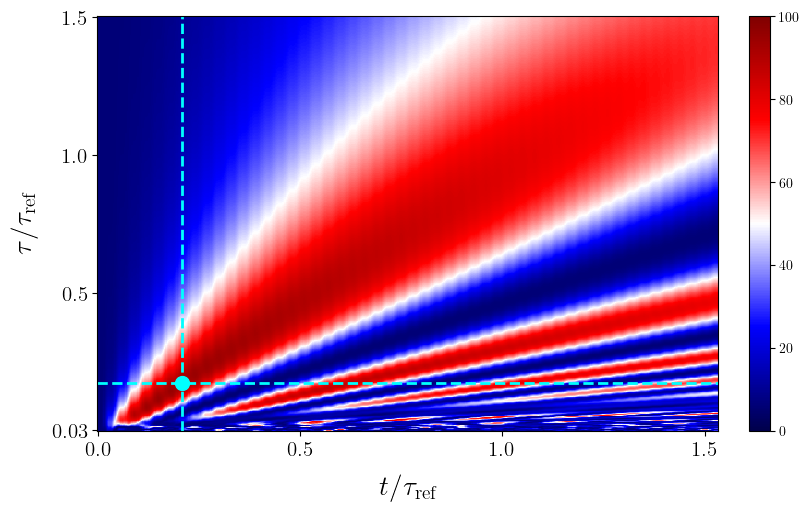

In [10]:
# the sample plot of the landscape
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

# try changing as you wish
gatetype = GateTypes.index('CY')     #GateTypes = ['X', 'H', 'T', 'CX', 'CH', 'CT', 'Y', 'CY']
site = Sites.index('2')    #Sites = ['1', '2', '3']
ty_pick = 3 #fidelity type ty for: 1. in the rotating frame without decoherence, 2. in the original frame without decoherence , 3. in the rotating frame with decoherence, and 4. in the original frame with decoherence 


pland = axis.pcolormesh(np.abs(fidelity_landscape[gatetype, site, ty_pick,:,:])*100, vmax = 100, vmin = 0, cmap = 'seismic')
fig.colorbar(pland)

(m_T_peak, m_t_peak) = peaks_positions[gatetype, site]

axis.axhline(y=m_T_peak, color='cyan', linestyle='--', linewidth=2)
axis.axvline(x=m_t_peak, color='cyan', linestyle='--', linewidth=2)
axis.plot(m_t_peak, m_T_peak, 'o', color='cyan', markersize=10)


axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=20, labelpad=10)
axis.set_ylabel(r"$\tau/\tau_{\rm ref}$", fontsize=20, labelpad=10)

axis.autoscale(enable=True, axis='x', tight=True)
axis.set_yticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(taulist_cut[0]/T_ref, decimals=2))+'$', r'$'+str(np.around(taulist_cut[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(M)]/T_ref, decimals=1))+'$'], fontsize=15)
axis.set_xticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(tlist[0]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M)]/T_ref, decimals=1))+'$'], fontsize=15)

print('The maximum fidelity of the gate ', GateTypes[gatetype], Sites[site], 'is',  np.max(fidelity_landscape[gatetype, site, ty_pick]), 'at tau = ', taulist_cut[int(m_T_peak)], 'ns, t=' , tlist[int(m_t_peak)], 'ns')

## Loading the Preliminary Fidelity Landscape and Finding the Suitable $\tau$: Multiple-Qubit Case

In [11]:
# basic plotting parameters
w_max = np.max([np.max(np.abs(omega_n_par)), np.max(np.abs(omega_n_perp))]) # 2π GHz
w_min = np.min([np.min(np.abs(omega_n_par)), np.min(np.abs(omega_n_perp))]) # 2π GHz

T_ref = 1/(2*np.pi*w_min) #ns
M = 500
m_offset = 10
tlist = np.linspace(0, 1.5*T_ref, M+m_offset+1) 
taulist = np.linspace(0, 1.5*T_ref, M+m_offset+1)
taulist_cut = taulist[m_offset:]

# The landscapes generated are given as functions of fidelity type (4) x taulist_cut x tlist

In [12]:
# Here we load the fidelity landscapes of single-qubit gates
GateTypes_double = ['XX', 'CXX', 'CYY', 'CXY']
Pairs = ['12', '23', '31']

fidelity_landscape_double = np.zeros(shape=[len(GateTypes_double), len(Pairs), 4, len(taulist_cut), len(tlist)])

for g in range(len(GateTypes_double)):
    for k in range(len(Pairs)):
        filename = r'fidelity landscape/fidel double/fidel_' + GateTypes_double[g] + '_diag_' + Pairs[k]
        fidelity_landscape_double[g, k] = pickle.load(open(filename, 'rb'))

GateTypes_triple = ['HHH', 'XXX', 'CHHH', 'CXXX']

fidelity_landscape_triple = np.zeros(shape=[len(GateTypes_triple), 4, len(taulist_cut), len(tlist)])
for g in GateTypes_triple:
    fidelity_landscape_triple[GateTypes_triple.index(g)] = pickle.load(open(r'fidelity landscape/fidel triple/fidel_'+g+'_diag', 'rb'))


In [13]:
# collect the peaks
peaks_positions_double = np.zeros(shape=[len(GateTypes_double), len(Pairs), 2])
peaks_positions_triple = np.zeros(shape=[len(GateTypes_triple), 2])

ty_pick = 3 #pick the optima from the profiles in the original frame with decoherence

for gatetype in GateTypes_double:
    for pair in Pairs:
        g = GateTypes_double.index(gatetype)
        p = Pairs.index(pair)
        m_T_offset = 0  # we don't want too small tau
        m_peak = np.where(fidelity_landscape_double[g, p, ty_pick,:,:]==np.max(fidelity_landscape_double[g, p, ty_pick, m_T_offset:,:]))
        peaks_positions_double[g, p][0], peaks_positions_double[g, p][1] = int(m_peak[0][0]), int(m_peak[1][0])    #take the first peak

for gatetype in GateTypes_triple:
    g = GateTypes_triple.index(gatetype)
    m_T_offset = M//10  # we don't want too small tau
    m_peak = np.where(fidelity_landscape_triple[g, ty_pick,:,:]==np.max(fidelity_landscape_triple[g, ty_pick, m_T_offset:,:]))
    peaks_positions_triple[g][0], peaks_positions_triple[g][1] = int(m_peak[0][0]), int(m_peak[1][0])    #take the first peak


The maximum fidelity of the gate  CXY 12 is 0.9169711269420019 at tau =  260.6851329051017 ns, t= 269.67427541907074 ns


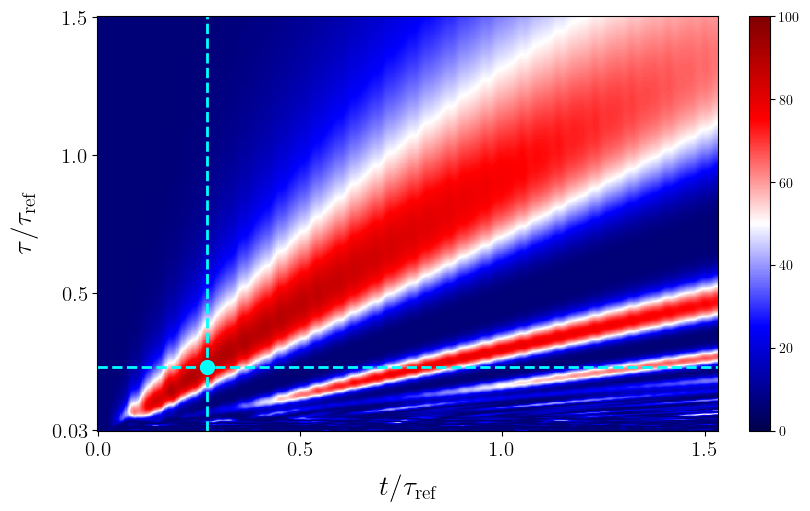

In [14]:
# the sample plot of the landscape for two-qubit gate
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

# try changing as you wish
M = 500
gatetype = GateTypes_double.index('CXY')     #GateTypes_double = ['XX', 'CXX', 'CYY', 'CXY']
pair = Pairs.index('12')    #Pairs = ['12', '23', '31']
ty_pick = 3 #fidelity type ty for: 1. in the rotating frame without decoherence, 2. in the original frame without decoherence , 3. in the rotating frame with decoherence, and 4. in the original frame with decoherence 


pland = axis.pcolormesh(np.abs(fidelity_landscape_double[gatetype, pair, ty_pick,:,:])*100, vmax = 100, vmin = 0, cmap = 'seismic')
fig.colorbar(pland)

(m_T_peak, m_t_peak) = peaks_positions_double[gatetype, pair]

axis.axhline(y=m_T_peak, color='cyan', linestyle='--', linewidth=2)
axis.axvline(x=m_t_peak, color='cyan', linestyle='--', linewidth=2)
axis.plot(m_t_peak, m_T_peak, 'o', color='cyan', markersize=10)


axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=20, labelpad=10)
axis.set_ylabel(r"$\tau/\tau_{\rm ref}$", fontsize=20, labelpad=10)

axis.autoscale(enable=True, axis='x', tight=True)
axis.set_yticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(taulist_cut[0]/T_ref, decimals=2))+'$', r'$'+str(np.around(taulist_cut[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(M)]/T_ref, decimals=1))+'$'], fontsize=15)
axis.set_xticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(tlist[0]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M)]/T_ref, decimals=1))+'$'], fontsize=15)

print('The maximum fidelity of the gate ', GateTypes_double[gatetype], Pairs[pair], 'is',  np.max(fidelity_landscape_double[gatetype, pair, ty_pick]), 'at tau = ', taulist_cut[int(m_T_peak)], 'ns, t=' , tlist[int(m_t_peak)], 'ns')

The maximum fidelity of the gate HHH is 0.9631302115840666 at tau =  182.77923111737016 ns, t= 182.77923111737016 ns


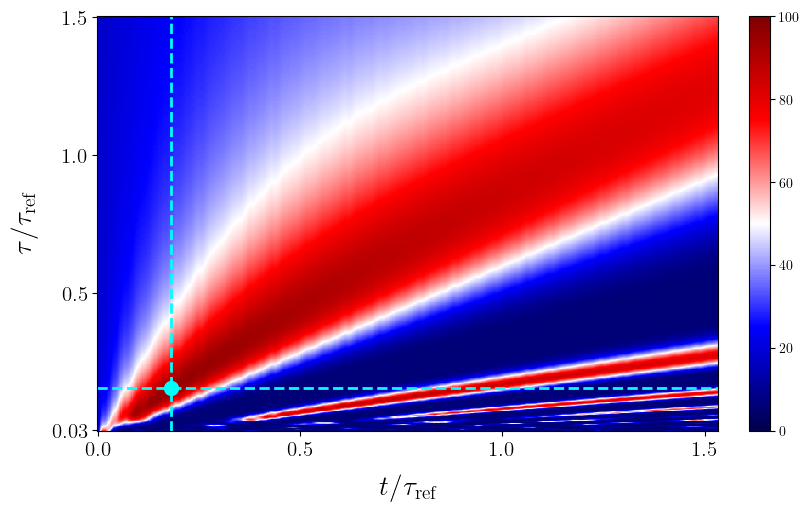

In [15]:
# the sample plot of the landscape for three-qubit gate
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

# try changing as you wish
gatetype = GateTypes_triple.index('HHH')     #GateTypes_triple = ['CHHH', 'CXXX']
ty_pick = 3 #fidelity type ty for: 1. in the rotating frame without decoherence, 2. in the original frame without decoherence , 3. in the rotating frame with decoherence, and 4. in the original frame with decoherence 


pland = axis.pcolormesh(np.abs(fidelity_landscape_triple[gatetype, ty_pick,:,:])*100, vmax = 100, vmin = 0, cmap = 'seismic')
fig.colorbar(pland)

(m_T_peak, m_t_peak) = peaks_positions_triple[gatetype]

axis.axhline(y=m_T_peak, color='cyan', linestyle='--', linewidth=2)
axis.axvline(x=m_t_peak, color='cyan', linestyle='--', linewidth=2)
axis.plot(m_t_peak, m_T_peak, 'o', color='cyan', markersize=10)


axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=20, labelpad=10)
axis.set_ylabel(r"$\tau/\tau_{\rm ref}$", fontsize=20, labelpad=10)

axis.autoscale(enable=True, axis='x', tight=True)
axis.set_yticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(taulist_cut[0]/T_ref, decimals=2))+'$', r'$'+str(np.around(taulist_cut[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(M)]/T_ref, decimals=1))+'$'], fontsize=15)
axis.set_xticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(tlist[0]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M)]/T_ref, decimals=1))+'$'], fontsize=15)

print('The maximum fidelity of the gate', GateTypes_triple[gatetype], 'is',  np.max(fidelity_landscape_triple[gatetype, ty_pick]), 'at tau = ', taulist_cut[int(m_T_peak)], 'ns, t=' , tlist[int(m_t_peak)], 'ns')

## Plotting and Generating Figures and Tables

#### Figure 2(a)

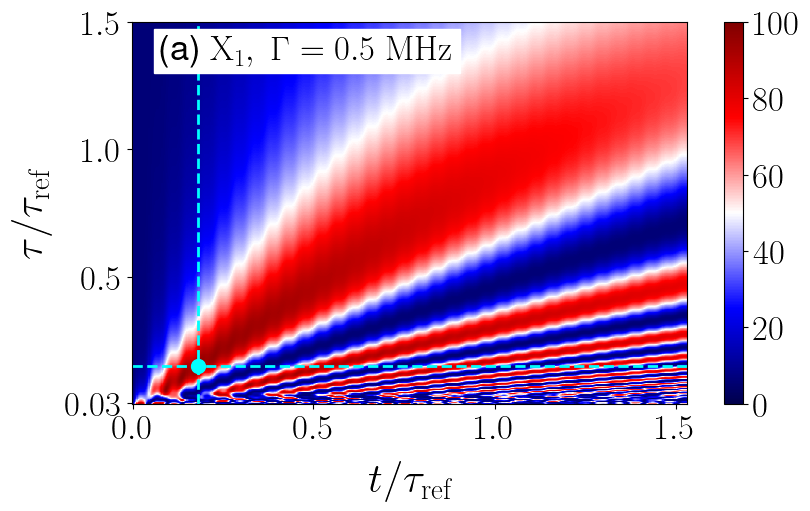

In [35]:
# plot of the landscape examplem of X1
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

gatetype = GateTypes.index('X')     #GateTypes = ['X', 'H', 'T', 'CX', 'CH', 'CT', 'Y', 'CY']
site = Sites.index('1')    #Sites = ['1', '2', '3']
ty_pick = 3 #fidelity type ty for: 1. in the rotating frame without decoherence, 2. in the original frame without decoherence , 3. in the rotating frame with decoherence, and 4. in the original frame with decoherence 


pland = axis.pcolormesh(np.abs(fidelity_landscape[gatetype, site, ty_pick,:,:])*100, vmax = 100, vmin = 0, cmap = 'seismic')
cbar = fig.colorbar(pland)
cbar.ax.tick_params(labelsize=25)

(m_T_peak, m_t_peak) = peaks_positions[gatetype, site]

axis.axhline(y=m_T_peak, color='cyan', linestyle='--', linewidth=2)
axis.axvline(x=m_t_peak, color='cyan', linestyle='--', linewidth=2)
axis.plot(m_t_peak, m_T_peak, 'o', color='cyan', markersize=10)


axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=30, labelpad=10)
axis.set_ylabel(r"$\tau/\tau_{\rm ref}$", fontsize=30, labelpad=10)

axis.autoscale(enable=True, axis='x', tight=True)
axis.set_yticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(taulist_cut[0]/T_ref, decimals=2))+'$', r'$'+str(np.around(taulist_cut[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(taulist_cut[int(M)]/T_ref, decimals=1))+'$'], fontsize=25)
axis.set_xticks([0.5, M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(tlist[0]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M)]/T_ref, decimals=1))+'$'], fontsize=25)
# axis.set_xticks([M//3 + 0.5, 2*M//3 + 0.5, M + 0.5],[r'$'+str(np.around(tlist[int(M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(2*M//3)]/T_ref, decimals=1))+'$', r'$'+str(np.around(tlist[int(M)]/T_ref, decimals=1))+'$'], fontsize=25)


axis.text(0.05, 0.90, r'(a) ${\rm X}_1,~\Gamma = 0.5~{\rm MHz}$', transform=axis.transAxes, size=25, backgroundcolor='white')

plt.savefig('Fig2a_Fidelity_X.pdf',bbox_inches='tight')

#### Figure 2(b)

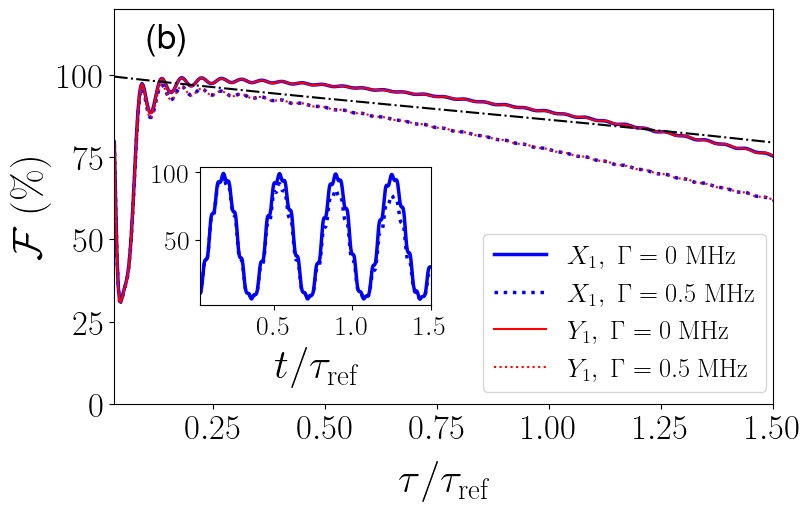

In [38]:
# compare X1 and Y1 along the the diagonal line of the landscape
CR = ['b-','b:','r-','r:','g-','g:']
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

gatetype = GateTypes.index('X')     #GateTypes = ['X', 'H', 'T', 'CX', 'CH', 'CT', 'Y', 'CY']
site = Sites.index('1')    #Sites = ['1', '2', '3']
ty_pick = 3 #fidelity type ty for: 1. in the rotating frame without decoherence, 2. in the original frame without decoherence , 3. in the rotating frame with decoherence, and 4. in the original frame with decoherence 

#X
fidel_X_decohere_diag = np.linspace(0, 1.5*T_ref, M+1)
fidel_X_diag = np.linspace(0, 1.5*T_ref, M+1)

for j in range(len(tlist[m_offset:])):
    fidel_X_decohere_diag[j] = fidelity_landscape[gatetype, site, ty_pick, j, m_offset+j] 
    fidel_X_diag[j] = fidelity_landscape[gatetype, site, ty_pick-2, j, m_offset+j]

axis.plot(tlist[m_offset:]/T_ref, (fidel_X_diag[:])*100, CR[0], lw=2.5)
axis.plot(tlist[m_offset:]/T_ref, (fidel_X_decohere_diag[:])*100, CR[1], lw=2.5)

#Y
gatetype = GateTypes.index('Y')
fidel_Y_decohere_diag = np.linspace(0, 1.5*T_ref, M+1)
fidel_Y_diag = np.linspace(0, 1.5*T_ref, M+1)

for j in range(len(tlist[m_offset:])):
    fidel_Y_decohere_diag[j] = fidelity_landscape[gatetype, site, ty_pick, j, m_offset+j] 
    fidel_Y_diag[j] = fidelity_landscape[gatetype, site, ty_pick-2, j, m_offset+j]

axis.plot(tlist[m_offset:]/T_ref, (fidel_Y_diag[:])*100, CR[2], lw=1.5)
axis.plot(tlist[m_offset:]/T_ref, (fidel_Y_decohere_diag[:])*100, CR[3], lw=1.5)


#iden diagonal
fidel_iden_diag = np.linspace(0, 1.5*T_ref, M+1)

for j in range(len(tlist[m_offset:])):
    fidel_iden_diag[j] = fidel_iden[ty_pick, j, m_offset+j] 

axis.plot(tlist[m_offset:]/T_ref, (fidel_iden_diag[:])*100, 'k-.', lw=1.5)

# axis.set_xlabel(r'$t~[{\rm ns}]$', size=25)
axis.set_xlabel(r"$\tau/\tau_{\rm ref}$", fontsize=30, labelpad=10)
axis.set_ylabel(r'$\mathcal{F}~(\%)$ ', size=30)
axis.autoscale(enable=True, axis='x', tight=True)
axis.set_ylim(0, 120)

##############################################################
axis2 = axis.inset_axes([0.13, 0.25, 0.35, 0.35])


(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('X'), site]
axis2.plot(tlist[m_offset:]/T_ref, fidelity_landscape[GateTypes.index('X'), site, ty_pick-2, int(m_T_peak), m_offset:]*100, CR[0], lw=2.5)
axis2.plot(tlist[m_offset:]/T_ref, fidelity_landscape[GateTypes.index('X'), site, ty_pick, int(m_T_peak), m_offset:]*100, CR[1], lw=2.5)

axis2.set_xlabel(r'$t/\tau_{\rm ref}$', size=30)
# axis2.set_ylabel(r'$\mathcal{F} (\%)$ ', size=25)
axis2.autoscale(enable=True, axis='x', tight=True)

##############################################################

# axis.set_yscale('log')
# axis.set_xscale('log')

axis.tick_params(axis='both', direction='out', labelsize=25)
axis2.tick_params(axis='both', direction='out', labelsize=20)

line_labels = [r'$X_1,~\Gamma = 0 ~{\rm MHz}$', r'$X_1,~\Gamma = 0.5~{\rm MHz}$'] + [r'$Y_1,~\Gamma = 0 ~{\rm MHz}$', r'$Y_1,~\Gamma = 0.5~{\rm MHz}$']
# fig.legend(labels=line_labels, fontsize=15, ncol=1, borderaxespad=0.1, loc='upper left',bbox_to_anchor=(0.085, 1.15))
fig.legend(labels=line_labels, fontsize=19, ncol=1, loc='lower left',bbox_to_anchor=(0.58, 0.20))

axis.text(0.05, 0.90, r'(b)', transform=axis.transAxes, size=25, backgroundcolor='white')


plt.savefig('Fig2b_Fidelity_X_diag.pdf',bbox_inches='tight')

## Profile Generators

### Unconditional Gates

In [18]:
#Hamiltonian in the original frame
def H_C_X(t, T): 
    H = 0
    for k in range(3):
        H += 2*(2*np.pi/T)*np.cos(a_klist[k]*t)*IIx[k]
    return H

def H_C_Y(t, T): 
    H = 0
    for k in range(3):
        H += 2*(2*np.pi/T)*np.cos(a_klist[k]*t)*IIy[k]
    return H

H_origin = 0
for k in range(3):
    H_origin += a_klist[k]*SIzz[k]
    H_origin += omega_n_par[k]*IIz[k]
    H_origin += omega_n_perp[k]*IIy[k]

H_prime = 0
for k in range(3):
    H_prime += a_klist[k]*SIzz[k]

In [19]:
# basic setup
def H_shift_X(t, T, phi_k):
    H = 0
    for k in range(3):
        H -= 2*(phi_k[k]/T)*np.cos(a_klist[k]*t)*IIx[k]
    return H

def U_target_rot_X(phi_k):
    G = 0
    for k in range(3):
        G += phi_k[k]*IIx[k] 
        
    return (1j*G).expm()

def H_shift_Y(t, T, phi_k):
    H = 0
    for k in range(3):
        H -= 2*(phi_k[k]/T)*np.cos(a_klist[k]*t)*IIy[k]
    return H

def U_target_rot_Y(phi_k):
    G = 0
    for k in range(3):
        G += phi_k[k]*IIy[k] 
        
    return (1j*G).expm()

# T2 decoherence
Gamma_2 = 1/(2e-6)
Gamma_2 = Gamma_2/units

In [20]:
# The functions below returns a list of the average gate fidelity as functions of time of four types: 1. in the original frame without decoherence , 2. in the original frame with decoherence 
def task_fidel_X(tlist, T, phi_k): 
    def H_main(t): 
        return H_origin + H_C_X(t, T) + H_shift_X(t, T, phi_k)
       
    def H_frame(t): #identity in original frame
        return H_prime + H_C_X(t, T)
    
    U_main = propagator(QobjEvo(H_main), tlist) # main evo
    U_frame = propagator(QobjEvo(H_frame), tlist)   #frame transform

    fidel_frame = np.array([average_gate_fidelity(U_frame[j].dag()*U_main[j], U_target_rot_X(phi_k)) for j in range(len(tlist))])
    
    #decohere
    U_main_decohere = propagator(QobjEvo(H_main), tlist, c_ops=[np.sqrt(Gamma_2)*SSz]) 
    U_frame_decohere = propagator(QobjEvo(H_frame), tlist, c_ops=[np.sqrt(Gamma_2)*SSz])

    fidel_frame_decohere = np.array([average_gate_fidelity(U_frame_decohere[j].dag()*U_main_decohere[j], U_target_rot_X(phi_k)) for j in range(len(tlist))])

    return fidel_frame, fidel_frame_decohere

def task_fidel_Y(tlist, T, phi_k): 
    def H_main(t): 
        return H_origin + H_C_Y(t, T) + H_shift_Y(t, T, phi_k)
       
    def H_frame(t): #identity in original frame
        return H_prime + H_C_Y(t, T)
    
    U_main = propagator(QobjEvo(H_main), tlist) # main evo
    U_frame = propagator(QobjEvo(H_frame), tlist)   #frame transform

    fidel_frame = np.array([average_gate_fidelity(U_frame[j].dag()*U_main[j], U_target_rot_Y(phi_k)) for j in range(len(tlist))])
    
    #decohere
    U_main_decohere = propagator(QobjEvo(H_main), tlist, c_ops=[np.sqrt(Gamma_2)*SSz]) 
    U_frame_decohere = propagator(QobjEvo(H_frame), tlist, c_ops=[np.sqrt(Gamma_2)*SSz])

    fidel_frame_decohere = np.array([average_gate_fidelity(U_frame_decohere[j].dag()*U_main_decohere[j], U_target_rot_Y(phi_k)) for j in range(len(tlist))])
    
    
    return fidel_frame, fidel_frame_decohere

### Conditional Gates


In [21]:
# cross axis shift
def H_shift_CX(t, T, phi_k):
    H = 0
    for k in range(3):
        H -= 2*(phi_k[k]/T)*np.sin(a_klist[k]*t)*IIy[k]
        
    return H

def U_target_rot_CX(phi_k):
    G = 0
    for k in range(3):
        G += phi_k[k]*SIzx[k] 
        
    return (1j*G).expm()

def H_shift_CY(t, T, phi_k):
    H = 0
    for k in range(3):
        H += 2*(phi_k[k]/T)*np.sin(a_klist[k]*t)*IIx[k]
        
    return H

def U_target_rot_CY(phi_k):
    G = 0
    for k in range(3):
        G += phi_k[k]*SIzy[k] 
        
    return (1j*G).expm()

# T2 decoherence
Gamma_2 = 1/(2e-6)
Gamma_2 = Gamma_2/units

In [22]:
# The functions below returns a list of the average gate fidelity as functions of time of four types: 1. in the original frame without decoherence , 2. in the original frame with decoherence 
def task_fidel_CX(tlist, T, phi_k): 
    def H_main(t): 
        return H_origin + H_C_X(t, T) + H_shift_CX(t, T, phi_k)
       
    def H_frame(t): #identity in original frame
        return H_prime + H_C_X(t, T)
    
    U_main = propagator(QobjEvo(H_main), tlist) # main evo
    U_frame = propagator(QobjEvo(H_frame), tlist)   #frame transform

    fidel_frame = np.array([average_gate_fidelity(U_frame[j].dag()*U_main[j], U_target_rot_CX(phi_k)) for j in range(len(tlist))])

    #decohere
    U_main_decohere = propagator(QobjEvo(H_main), tlist, c_ops=[np.sqrt(Gamma_2)*SSz]) 
    U_frame_decohere = propagator(QobjEvo(H_frame), tlist, c_ops=[np.sqrt(Gamma_2)*SSz])

    fidel_frame_decohere = np.array([average_gate_fidelity(U_frame_decohere[j].dag()*U_main_decohere[j], U_target_rot_CX(phi_k)) for j in range(len(tlist))])


    return fidel_frame, fidel_frame_decohere

def task_fidel_CY(tlist, T, phi_k): 
    def H_main(t): 
        return H_origin + H_C_Y(t, T) + H_shift_CY(t, T, phi_k)
       
    def H_frame(t): #identity in original frame
        return H_prime + H_C_Y(t, T)
    
    U_main = propagator(QobjEvo(H_main), tlist) # main evo
    U_frame = propagator(QobjEvo(H_frame), tlist)   #frame transform

    fidel_frame = np.array([average_gate_fidelity(U_frame[j].dag()*U_main[j], U_target_rot_CY(phi_k)) for j in range(len(tlist))])

    #decohere
    U_main_decohere = propagator(QobjEvo(H_main), tlist, c_ops=[np.sqrt(Gamma_2)*SSz]) 
    U_frame_decohere = propagator(QobjEvo(H_frame), tlist, c_ops=[np.sqrt(Gamma_2)*SSz])

    fidel_frame_decohere = np.array([average_gate_fidelity(U_frame_decohere[j].dag()*U_main_decohere[j], U_target_rot_CY(phi_k)) for j in range(len(tlist))])


    return fidel_frame, fidel_frame_decohere

## Comparisons among the Gates

### Unconditional

### Figure 2(c)

In [23]:
# comparisons of different types of gate
site = '1'   # pick the first site as an example
M = 1000
tlist_fine = np.linspace(0, 0.5*T_ref, M+1) 

#X1 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('X'), Sites.index(site)]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)] = np.pi 

fidel_X1  = task_fidel_X(tlist_fine, T, phi_k)
print('X1: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#X2 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('X'), Sites.index(site)+1]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)+1] = np.pi 

fidel_X2  = task_fidel_X(tlist_fine, T, phi_k)
print('X2: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#H1 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('H'), Sites.index(site)]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)] = np.pi/2 

fidel_H  = task_fidel_X(tlist_fine, T, phi_k)
print('H1: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#T1 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('T'), Sites.index(site)]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)] = np.pi/4 

fidel_T  = task_fidel_X(tlist_fine, T, phi_k)
print('T1: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#identity gate for reference
T = m_T_peak    # tau of T gate as it is the minimum of all
phi_k = np.array([0., 0., 0.]) 
fidel_iden_uncon  = task_fidel_X(tlist_fine, T, phi_k)

X1:  50 179.78285027938048 [3.14159265 0.         0.        ]
X2:  50 179.78285027938048 [0.         3.14159265 0.        ]
H1:  51 182.77923111737016 [1.57079633 0.         0.        ]
T1:  50 179.78285027938048 [0.78539816 0.         0.        ]


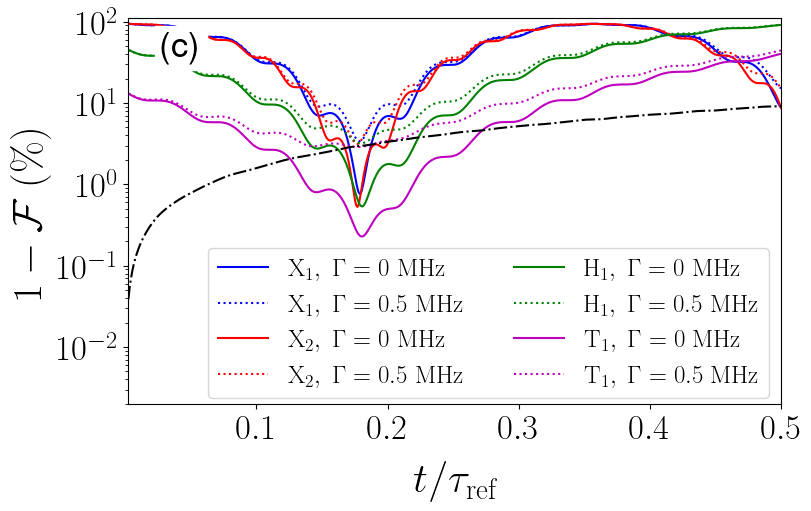

In [41]:
CR = ['b-','b:','r-','r:','g-','g:','m-','m:']
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

m_t_offset = M//100

#X1
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_X1[0][m_t_offset:])*100, CR[0], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_X1[1][m_t_offset:])*100, CR[1], lw=1.5)

#X2
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_X2[0][m_t_offset:])*100, CR[2], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_X2[1][m_t_offset:])*100, CR[3], lw=1.5)

#H1
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_H[0][m_t_offset:])*100, CR[4], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_H[1][m_t_offset:])*100, CR[5], lw=1.5)

#T1
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_T[0][m_t_offset:])*100, CR[6], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_T[1][m_t_offset:])*100, CR[7], lw=1.5)

axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_iden_uncon[1][m_t_offset:])*100, 'k-.', lw=1.5)  #identity with decoherence, at tau for the minimum of all above

# ######
plt.tick_params(axis='both', direction='out', labelsize=25)

# axis.set_xlabel(r'$t~[{\rm ns}]$', size=25)
axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=30, labelpad=10)
axis.set_ylabel(r'$1-\mathcal{F}~(\%)$ ', size=30)
axis.autoscale(enable=True, axis='x', tight=True)
axis.set_ylim(0.002, 110)

axis.set_yscale('log')
# axis.set_xscale('log')

line_labels = [r'${\rm X}_1,~\Gamma = 0 ~{\rm MHz}$', r'${\rm X}_1,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm X}_2,~\Gamma = 0 ~{\rm MHz}$', r'${\rm X}_2,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm H}_1,~\Gamma = 0 ~{\rm MHz}$', r'${\rm H}_1,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm T}_1,~\Gamma = 0 ~{\rm MHz}$', r'${\rm T}_1,~\Gamma = 0.5~{\rm MHz}$']
fig.legend(labels=line_labels, fontsize=18, ncol=2, borderaxespad=0.1, loc='lower left',bbox_to_anchor=(0.250, 0.210))

axis.text(0.05, 0.90, r'(c)', transform=axis.transAxes, size=25, backgroundcolor='white')

plt.savefig('Fig2c_Fidelity_single_unconditional.pdf',bbox_inches='tight')

### Figure 2(d)

In [25]:
# comparisons of different types of gate
#### Double ####
pair = '12'   # pick the first two sites as an example
M = 1000
tlist_fine = np.linspace(0, 0.5*T_ref, M+1) 

# angles phi_k from pair
phi_k = np.array([0., 0., 0.]) 
import re
site_in_pair = [i for i in re.split('', pair) if i]
for site in site_in_pair:
    phi_k[Sites.index(site)] = np.pi 
print('phi_k = ', phi_k)

#### Double ####
#XX_12 gate
(m_T_peak, m_t_peak) = peaks_positions_double[GateTypes_double.index('XX'), Pairs.index(pair)]
T = taulist_cut[int(m_T_peak)]

fidel_XX12 = task_fidel_X(tlist_fine, T, phi_k)
print('XX_12: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_double[GateTypes_double.index('XX'), Pairs.index(pair), ty_pick]))

#XX_23 gate
(m_T_peak, m_t_peak) = peaks_positions_double[GateTypes_double.index('XX'), Pairs.index(pair)+1]
T = taulist_cut[int(m_T_peak)]

fidel_XX23 = task_fidel_X(tlist_fine, T, phi_k)
print('XX_23: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_double[GateTypes_double.index('XX'), Pairs.index(pair)+1, ty_pick]))


#### Triple ####
#XXX gate
(m_T_peak, m_t_peak) = peaks_positions_triple[GateTypes_triple.index('XXX')]
T = taulist_cut[int(m_T_peak)]
phi_k = np.array([np.pi, np.pi, np.pi])

fidel_XXX = task_fidel_X(tlist_fine, T, phi_k)
print('XXX: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_triple[GateTypes_triple.index('XXX'), ty_pick]))

#HHH gate
(m_T_peak, m_t_peak) = peaks_positions_triple[GateTypes_triple.index('CHHH')]
T = taulist_cut[int(m_T_peak)]
phi_k = np.array([np.pi/4, np.pi/4, np.pi/4])

fidel_HHH = task_fidel_X(tlist_fine, T, phi_k)
print('HHH: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_triple[GateTypes_triple.index('HHH'), ty_pick]))


phi_k =  [3.14159265 3.14159265 0.        ]
XX_12:  49 tau= 176.7864694413908 fidel_max =  0.9605871108329705
XX_23:  40 tau= 149.81904189948375 fidel_max =  0.9625632929166325
XXX:  51 tau= 182.77923111737016 fidel_max =  0.9549483908599923
HHH:  50 tau= 179.78285027938048 fidel_max =  0.9631302115840666


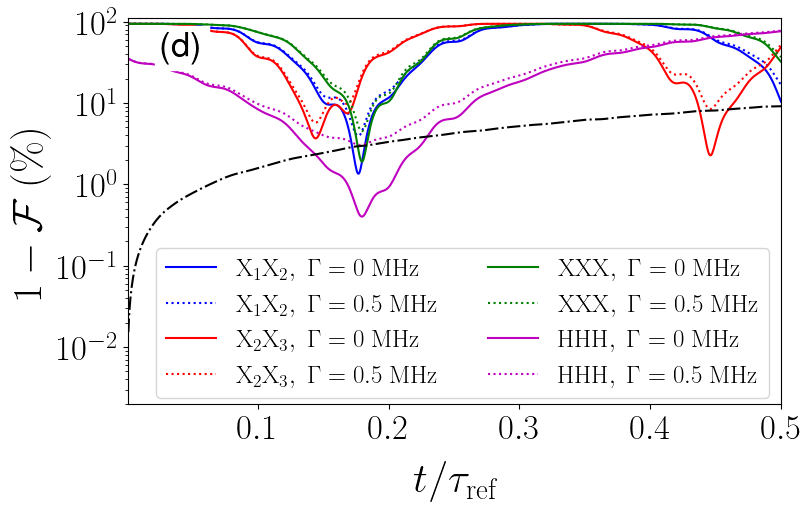

In [44]:
CR = ['b-','b:','r-','r:','g-','g:','m-','m:']
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

m_t_offset = M//200

#XX_12
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_XX12[0][m_t_offset:])*100, CR[0], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_XX12[1][m_t_offset:])*100, CR[1], lw=1.5)

#XX_23
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_XX23[0][m_t_offset:])*100, CR[2], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_XX23[1][m_t_offset:])*100, CR[3], lw=1.5)

#CXXX
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_XXX[0][m_t_offset:])*100, CR[4], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_XXX[1][m_t_offset:])*100, CR[5], lw=1.5)

#HHH
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_HHH[0][m_t_offset:])*100, CR[6], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_HHH[1][m_t_offset:])*100, CR[7], lw=1.5)

axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_iden_uncon[1][m_t_offset:])*100, 'k-.', lw=1.5)  #identity with decoherence

# ######
plt.tick_params(axis='both', direction='out', labelsize=25)

# axis.set_xlabel(r'$t~[{\rm ns}]$', size=25)
axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=30, labelpad=10)
axis.set_ylabel(r'$1-\mathcal{F}~(\%)$ ', size=30)
axis.autoscale(enable=True, axis='x', tight=True)
axis.set_ylim(0.002, 110)

axis.set_yscale('log')
# axis.set_xscale('log')

line_labels = [r'${\rm X}_1{\rm X}_2,~\Gamma = 0 ~{\rm MHz}$', r'${\rm X}_1{\rm X}_2,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm X}_2{\rm X}_3,~\Gamma = 0 ~{\rm MHz}$', r'${\rm X}_2{\rm X}_3,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm XXX},~\Gamma = 0 ~{\rm MHz}$', r'${\rm XXX},~\Gamma = 0.5~{\rm MHz}$']  + [r'${\rm HHH},~\Gamma = 0 ~{\rm MHz}$', r'${\rm HHH},~\Gamma = 0.5~{\rm MHz}$']
fig.legend(labels=line_labels, fontsize=18, ncol=2, borderaxespad=0.1, loc='lower left',bbox_to_anchor=(0.185, 0.210))

axis.text(0.05, 0.90, r'(d)', transform=axis.transAxes, size=25, backgroundcolor='white')

plt.savefig('Fig2d_Fidelity_XX-HHH-XXX.pdf',bbox_inches='tight')


### Conditional

### Figure 3(a)

In [27]:
# comparisons of different types of gate
site = '1'   # pick the first site as an example
M = 1000
tlist_fine = np.linspace(0, 0.5*T_ref, M+1) 

#CX1 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('CX'), Sites.index(site)]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)] = np.pi 

fidel_CX1  = task_fidel_CX(tlist_fine, T, phi_k)
print('CX1: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#CX2 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('CX'), Sites.index(site)+1]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)+1] = np.pi 

fidel_CX2  = task_fidel_CX(tlist_fine, T, phi_k)
print('CX2: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#CH1 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('CH'), Sites.index(site)]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)] = np.pi/2 

fidel_CH  = task_fidel_CX(tlist_fine, T, phi_k)
print('CH1: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#CT1 gate
(m_T_peak, m_t_peak) = peaks_positions[GateTypes.index('CT'), Sites.index(site)]
T = taulist_cut[int(m_T_peak)]

phi_k = np.array([0., 0., 0.]) 
phi_k[Sites.index(site)] = np.pi/4 

fidel_CT  = task_fidel_CX(tlist_fine, T, phi_k)
print('CT1: ', int(m_T_peak), taulist_cut[int(m_T_peak)], phi_k)

#identity gate for reference
T = m_T_peak    # tau of T gate as it is the minimum of all
phi_k = np.array([0., 0., 0.]) 
fidel_iden_con  = task_fidel_CX(tlist_fine, T, phi_k)

CX1:  62 215.7394203352566 [3.14159265 0.         0.        ]
CX2:  58 203.7538969832979 [0.         3.14159265 0.        ]
CH1:  50 179.78285027938048 [1.57079633 0.         0.        ]
CT1:  50 179.78285027938048 [0.78539816 0.         0.        ]


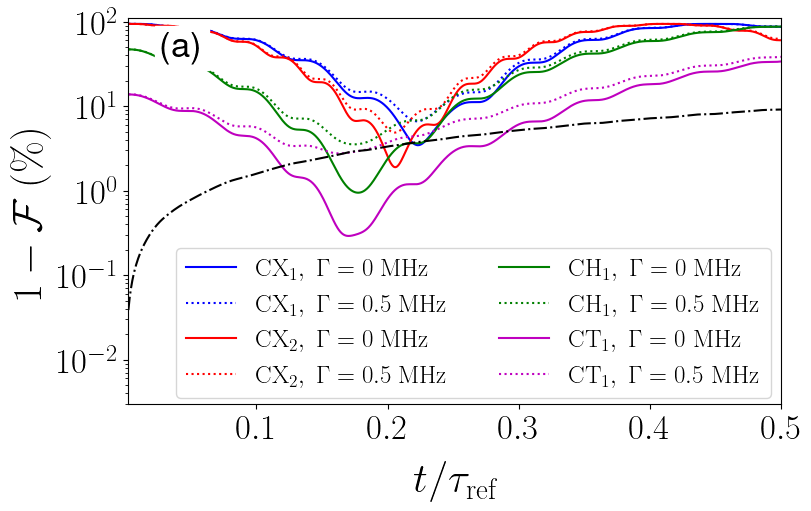

In [46]:
CR = ['b-','b:','r-','r:','g-','g:','m-','m:']
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

m_t_offset = M//100

#CX1
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CX1[0][m_t_offset:])*100, CR[0], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CX1[1][m_t_offset:])*100, CR[1], lw=1.5)

#CX2
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CX2[0][m_t_offset:])*100, CR[2], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CX2[1][m_t_offset:])*100, CR[3], lw=1.5)

#CH1
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CH[0][m_t_offset:])*100, CR[4], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CH[1][m_t_offset:])*100, CR[5], lw=1.5)

#CT1
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CT[0][m_t_offset:])*100, CR[6], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CT[1][m_t_offset:])*100, CR[7], lw=1.5)

axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_iden_con[1][m_t_offset:])*100, 'k-.', lw=1.5)  #identity with decoherence, at tau for the minimum of all above

# ######
plt.tick_params(axis='both', direction='out', labelsize=25)

# axis.set_xlabel(r'$t~[{\rm ns}]$', size=25)
axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=30, labelpad=10)
axis.set_ylabel(r'$1-\mathcal{F}~(\%)$ ', size=30)
axis.autoscale(enable=True, axis='x', tight=True)
axis.set_ylim(0.003, 110)

axis.set_yscale('log')
# axis.set_xscale('log')

line_labels = [r'${\rm CX}_1,~\Gamma = 0 ~{\rm MHz}$', r'${\rm CX}_1,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm CX}_2,~\Gamma = 0 ~{\rm MHz}$', r'${\rm CX}_2,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm CH}_1,~\Gamma = 0 ~{\rm MHz}$', r'${\rm CH}_1,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm CT}_1,~\Gamma = 0 ~{\rm MHz}$', r'${\rm CT}_1,~\Gamma = 0.5~{\rm MHz}$']
fig.legend(labels=line_labels, fontsize=18, ncol=2, borderaxespad=0.1, loc='lower left',bbox_to_anchor=(0.210, 0.210))

axis.text(0.05, 0.90, r'(a)', transform=axis.transAxes, size=25, backgroundcolor='white')

plt.savefig('Fig3a_Fidelity_single_conditional.pdf',bbox_inches='tight')

### Figure 3(b)

In [29]:
# comparisons of different types of gate
#### Double ####
pair = '12'   # pick the first two sites as an example
M = 1000
tlist_fine = np.linspace(0, 0.5*T_ref, M+1) 

#### Double ####
#CXX_12 gate
# angles phi_k from pair
phi_k = np.array([0., 0., 0.]) 
import re
site_in_pair = [i for i in re.split('', pair) if i]
for site in site_in_pair:
    phi_k[Sites.index(site)] = np.pi 
print('phi_k = ', phi_k)

(m_T_peak, m_t_peak) = peaks_positions_double[GateTypes_double.index('CXX'), Pairs.index(pair)]
T = taulist_cut[int(m_T_peak)]

fidel_CXX12 = task_fidel_CX(tlist_fine, T, phi_k)
print('CXX_12: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_double[GateTypes_double.index('CXX'), Pairs.index(pair), ty_pick]))

#CXX_23 gate
# angles phi_k from pair
phi_k = np.array([0., 0., 0.]) 
import re
site_in_pair = [i for i in re.split('', pair) if i]
for site in site_in_pair:
    phi_k[(Sites.index(site)+1)%3] = np.pi #12 to 23
print('phi_k = ', phi_k)

(m_T_peak, m_t_peak) = peaks_positions_double[GateTypes_double.index('CXX'), Pairs.index(pair)+1]
T = taulist_cut[int(m_T_peak)]

fidel_CXX23 = task_fidel_CX(tlist_fine, T, phi_k)
print('CXX_23: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_double[GateTypes_double.index('CXX'), Pairs.index(pair), ty_pick]))

#### Triple ####
#CXXX gate
(m_T_peak, m_t_peak) = peaks_positions_triple[GateTypes_triple.index('CXXX')]
T = taulist_cut[int(m_T_peak)]
phi_k = np.array([np.pi, np.pi, np.pi])

fidel_CXXX = task_fidel_CX(tlist_fine, T, phi_k)
print('CXXX: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_triple[GateTypes_triple.index('CXXX'), ty_pick]))

#CHHH gate
(m_T_peak, m_t_peak) = peaks_positions_triple[GateTypes_triple.index('CHHH')]
T = taulist_cut[int(m_T_peak)]
phi_k = np.array([np.pi/4, np.pi/4, np.pi/4])

fidel_CHHH = task_fidel_CX(tlist_fine, T, phi_k)
print('CHHH: ', int(m_T_peak), 'tau=', taulist_cut[int(m_T_peak)], 'fidel_max = ', np.max(fidelity_landscape_triple[GateTypes_triple.index('CHHH'), ty_pick]))


phi_k =  [3.14159265 3.14159265 0.        ]
CXX_12:  77 tau= 260.6851329051017 fidel_max =  0.9169034440624667
phi_k =  [0.         3.14159265 3.14159265]
CXX_23:  58 tau= 203.7538969832979 fidel_max =  0.9169034440624667
CXXX:  77 tau= 260.6851329051017 fidel_max =  0.8976367879227861
CHHH:  50 tau= 179.78285027938048 fidel_max =  0.9579017033178717


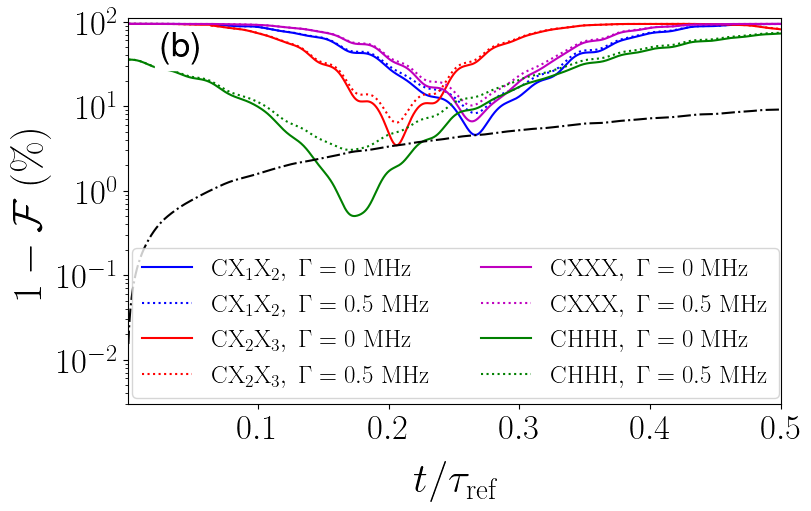

In [50]:
CR = ['b-','b:','r-','r:','g-','g:','m-','m:']
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

m_t_offset = M//200

#CXX_12
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CXX12[0][m_t_offset:])*100, CR[0], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CXX12[1][m_t_offset:])*100, CR[1], lw=1.5)

#CXX_23
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CXX23[0][m_t_offset:])*100, CR[2], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CXX23[1][m_t_offset:])*100, CR[3], lw=1.5)

#CXXX
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CXXX[0][m_t_offset:])*100, CR[6], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CXXX[1][m_t_offset:])*100, CR[7], lw=1.5)

#CHHH
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CHHH[0][m_t_offset:])*100, CR[4], lw=1.5)
axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_CHHH[1][m_t_offset:])*100, CR[5], lw=1.5)

axis.plot(tlist_fine[m_t_offset:]/T_ref, (1-fidel_iden_con[1][m_t_offset:])*100, 'k-.', lw=1.5)  #identity with decoherence

# ######
plt.tick_params(axis='both', direction='out', labelsize=25)

# axis.set_xlabel(r'$t~[{\rm ns}]$', size=25)
axis.set_xlabel(r"$t/\tau_{\rm ref}$", fontsize=30, labelpad=10)
axis.set_ylabel(r'$1-\mathcal{F}~(\%)$ ', size=30)
axis.autoscale(enable=True, axis='x', tight=True)
axis.set_ylim(0.003, 110)

axis.set_yscale('log')
# axis.set_xscale('log')

line_labels = [r'${\rm CX}_1{\rm X}_2,~\Gamma = 0 ~{\rm MHz}$', r'${\rm CX}_1{\rm X}_2,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm CX}_2{\rm X}_3,~\Gamma = 0 ~{\rm MHz}$', r'${\rm CX}_2{\rm X}_3,~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm CXXX},~\Gamma = 0 ~{\rm MHz}$', r'${\rm CXXX},~\Gamma = 0.5~{\rm MHz}$'] + [r'${\rm CHHH},~\Gamma = 0 ~{\rm MHz}$', r'${\rm CHHH},~\Gamma = 0.5~{\rm MHz}$']
fig.legend(labels=line_labels, fontsize=18, ncol=2, borderaxespad=0.1, loc='lower left',bbox_to_anchor=(0.155, 0.210))

axis.text(0.05, 0.90, r'(b)', transform=axis.transAxes, size=25, backgroundcolor='white')

plt.savefig('Fig3b_Fidelity_CXX-CHHH-CXXX.pdf',bbox_inches='tight')


### Tables: Single-Qubit and Multiple-Qubit Gate Examples

#### Reload

In [31]:
# basic plotting parameters
w_max = np.max([np.max(np.abs(omega_n_par)), np.max(np.abs(omega_n_perp))]) # 2π GHz
w_min = np.min([np.min(np.abs(omega_n_par)), np.min(np.abs(omega_n_perp))]) # 2π GHz

T_ref = 1/(2*np.pi*w_min) #ns
M = 500
m_offset = 10
tlist = np.linspace(0, 1.5*T_ref, M+m_offset+1) 
taulist = np.linspace(0, 1.5*T_ref, M+m_offset+1)
taulist_cut = taulist[m_offset:]

# The landscapes generated are given as functions of fidelity type (4) x taulist_cut x tlist
# Here we load the fidelity landscapes of single-qubit gates
GateTypes = ['X', 'H', 'T', 'CX', 'CH', 'CT', 'Y', 'CY']
Sites = ['1', '2', '3']

import pickle
fidel_iden = pickle.load(open('fidelity landscape/fidel single/fidel_iden_diag','rb')) #this is the baseline given by the dephasing effect

fidelity_landscape = np.zeros(shape=[len(GateTypes), len(Sites), 4, len(taulist_cut), len(tlist)])

for g in range(len(GateTypes)):
    for k in range(len(Sites)):
        filename = r'fidelity landscape/fidel single/fidel_' + GateTypes[g] + '_diag_' + Sites[k]
        fidelity_landscape[g, k] = pickle.load(open(filename, 'rb'))

# collect the peaks
peaks_positions = np.zeros(shape=[len(GateTypes), len(Sites), 2])

ty_pick = 3 #pick the optima from the profiles in the original frame with decoherence

for gatetype in GateTypes:
    for site in Sites:
        g = GateTypes.index(gatetype)
        k = Sites.index(site)
        m_T_offset = M//10  # we don't want too small tau
        m_peak = np.where(fidelity_landscape[g, k, ty_pick,:,:]==np.max(fidelity_landscape[g, k, ty_pick, m_T_offset:,:]))
        peaks_positions[g, k][0], peaks_positions[g, k][1] = int(m_peak[0][0]), int(m_peak[1][0])    #take the first peak
# basic plotting parameters
w_max = np.max([np.max(np.abs(omega_n_par)), np.max(np.abs(omega_n_perp))]) # 2π GHz
w_min = np.min([np.min(np.abs(omega_n_par)), np.min(np.abs(omega_n_perp))]) # 2π GHz

T_ref = 1/(2*np.pi*w_min) #ns
M = 500
m_offset = 10
tlist = np.linspace(0, 1.5*T_ref, M+m_offset+1) 
taulist = np.linspace(0, 1.5*T_ref, M+m_offset+1)
taulist_cut = taulist[m_offset:]

# The landscapes generated are given as functions of fidelity type (4) x taulist_cut x tlist
# Here we load the fidelity landscapes of single-qubit gates
GateTypes_double = ['XX', 'CXX', 'CYY', 'CXY']
Pairs = ['12', '23', '31']

fidelity_landscape_double = np.zeros(shape=[len(GateTypes_double), len(Pairs), 4, len(taulist_cut), len(tlist)])

for g in range(len(GateTypes_double)):
    for k in range(len(Pairs)):
        filename = r'fidelity landscape/fidel double/fidel_' + GateTypes_double[g] + '_diag_' + Pairs[k]
        fidelity_landscape_double[g, k] = pickle.load(open(filename, 'rb'))

GateTypes_triple = ['HHH', 'XXX', 'CHHH', 'CXXX']

fidelity_landscape_triple = np.zeros(shape=[len(GateTypes_triple), 4, len(taulist_cut), len(tlist)])
for g in GateTypes_triple:
    fidelity_landscape_triple[GateTypes_triple.index(g)] = pickle.load(open(r'fidelity landscape/fidel triple/fidel_'+g+'_diag', 'rb'))

# collect the peaks
peaks_positions_double = np.zeros(shape=[len(GateTypes_double), len(Pairs), 2])
peaks_positions_triple = np.zeros(shape=[len(GateTypes_triple), 2])

ty_pick = 3 #pick the optima from the profiles in the original frame with decoherence

for gatetype in GateTypes_double:
    for pair in Pairs:
        g = GateTypes_double.index(gatetype)
        p = Pairs.index(pair)
        m_T_offset = 0  # we don't want too small tau
        m_peak = np.where(fidelity_landscape_double[g, p, ty_pick,:,:]==np.max(fidelity_landscape_double[g, p, ty_pick, m_T_offset:,:]))
        peaks_positions_double[g, p][0], peaks_positions_double[g, p][1] = int(m_peak[0][0]), int(m_peak[1][0])    #take the first peak

for gatetype in GateTypes_triple:
    g = GateTypes_triple.index(gatetype)
    m_T_offset = M//10  # we don't want too small tau
    m_peak = np.where(fidelity_landscape_triple[g, ty_pick,:,:]==np.max(fidelity_landscape_triple[g, ty_pick, m_T_offset:,:]))
    peaks_positions_triple[g][0], peaks_positions_triple[g][1] = int(m_peak[0][0]), int(m_peak[1][0])    #take the first peak


### Table 2

In [32]:
# Here we generate the table demonstrating the Fidelity for several gates in the appendix
with open('Tab2_Fidelity_max_full.txt', 'w') as f:
    print(r'\begin{tabular}{'+6*r'c'+r'}', file=f)

    print(r'\multirow{2}{*}{Gate}  &   \multirow{2}{*}{N}   &   \multicolumn{2}{c}{Fidelity $(\%)$}  &  \multirow{2}{*}{$\tau~({\rm ns})$}    &   \multirow{2}{*}{$t_{\rm gate}~({\rm ns})$} \\    \cline{3-4}', file=f)
    print(r'   &   &  $\Gamma = 0~{\rm MHz}$  &  $\Gamma = 0.5~{\rm MHz}$  &   &  \\', file=f)
    print(r'\hline', file=f)

    # single qubit gates
    for gatetype in GateTypes:
        for site in Sites:
            g = GateTypes.index(gatetype)
            k = Sites.index(site)
            (m_T_peak, m_t_peak) = peaks_positions[g, k]

            # column 1
            if site=='1':
                row = r'\multirow{3}{*}{' + gatetype + '}   &'
            else:
                row = r'    &'

            # column 2
            row += site + r'    &'

            # column 3
            ty_pick = 1
            row += r'{$'+str(f'{fidelity_landscape[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

            # column 4
            ty_pick = 3
            row += r'{$'+str(f'{fidelity_landscape[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

            # column 5-6
            row += r'{$'+str(f'{taulist_cut[int(m_T_peak)]:.2f}')+r'$} &'
            row += r'{$'+str(f'{tlist[int(m_t_peak)]:.2f}')+r'$} &'

            print(row.rstrip(row[-1])+r'\\', file=f)

        print(r'\hline', file=f)

    # two qubit gates
    for gatetype in GateTypes_double:
        for pair in Pairs:
            g = GateTypes_double.index(gatetype)
            k = Pairs.index(pair)
            (m_T_peak, m_t_peak) = peaks_positions_double[g, k]

            # column 1
            if pair=='12':
                row = r'\multirow{3}{*}{' + gatetype + '}   &'
            else:
                row = r'    &'

            # column 2
            row += pair + r'    &'

            # column 3
            ty_pick = 1
            row += r'{$'+str(f'{fidelity_landscape_double[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

            # column 4
            ty_pick = 3
            row += r'{$'+str(f'{fidelity_landscape_double[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

            # column 5-6
            row += r'{$'+str(f'{taulist_cut[int(m_T_peak)]:.2f}')+r'$} &'
            row += r'{$'+str(f'{tlist[int(m_t_peak)]:.2f}')+r'$} &'

            print(row.rstrip(row[-1])+r'\\', file=f)

        print(r'\hline', file=f)

    # three qubit gates
    for gatetype in GateTypes_triple:
        g = GateTypes_triple.index(gatetype)
        (m_T_peak, m_t_peak) = peaks_positions_triple[g]

        # column 1
        row = r'\multicolumn{2}{c}{' + gatetype + '}   &'
            
        # column 3
        ty_pick = 1
        row += r'{$'+str(f'{fidelity_landscape_triple[g, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

        # column 4
        ty_pick = 3
        row += r'{$'+str(f'{fidelity_landscape_triple[g, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

        # column 5-6
        row += r'{$'+str(f'{taulist_cut[int(m_T_peak)]:.2f}')+r'$} &'
        row += r'{$'+str(f'{tlist[int(m_t_peak)]:.2f}')+r'$} &'

        print(row.rstrip(row[-1])+r'\\', file=f)

    print(r'\end{tabular}', file=f)

### Table 1

In [33]:
# Here we generate the table demonstrating the Fidelity for some gates in the main text
GateTypes_part = ['X', 'H', 'T', 'CX', 'CH', 'CT']
GateTypes_part_double = ['XX','CXX']
GateTypes_part_triple = ['HHH','XXX','CHHH','CXXX']


with open('Tab1_Fidelity_max_selected.txt', 'w') as f:
    print(r'\begin{tabular}{'+5*r'c'+r'}', file=f)

    print(r'\multirow{2}{*}{Gate}   &   \multicolumn{2}{c}{Fidelity $(\%)$}  &  \multirow{2}{*}{$\tau~({\rm ns})$}    &   \multirow{2}{*}{$t_{\rm gate}~({\rm ns})$} \\    \cline{2-3}', file=f)
    print(r'   &  $\Gamma = 0~{\rm MHz}$  &  $\Gamma = 0.5~{\rm MHz}$  &   &  \\', file=f)
    print(r'\hline', file=f)

    # single qubit gates
    for gatetype in GateTypes_part:
        if gatetype != 'X' and gatetype != 'CX':
            site = '1'
            g = GateTypes_part.index(gatetype)
            k = Sites.index(site)
            (m_T_peak, m_t_peak) = peaks_positions[g, k]
            # column 1
            row = r'$\rm~' + gatetype + r'_' + site + r'$   &'

            # column 2
            ty_pick = 1
            row += r'{$'+str(f'{fidelity_landscape[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

            # column 3
            ty_pick = 3
            row += r'{$'+str(f'{fidelity_landscape[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'
            
            # column 4-5
            row += r'{$'+str(f'{taulist_cut[int(m_T_peak)]:.2f}')+r'$} &'
            row += r'{$'+str(f'{tlist[int(m_t_peak)]:.2f}')+r'$} &'
            
            print(row.rstrip(row[-1])+r'\\', file=f)
        else:
            for site in ['1', '2']:
                g = GateTypes_part.index(gatetype)
                k = Sites.index(site)
                (m_T_peak, m_t_peak) = peaks_positions[g, k]
                # column 1
                row = r'$\rm~' + gatetype + r'_' + site + r'$   &'

                # column 2
                ty_pick = 1
                row += r'{$'+str(f'{fidelity_landscape[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

                # column 3
                ty_pick = 3
                row += r'{$'+str(f'{fidelity_landscape[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'
                
                # column 4-5
                row += r'{$'+str(f'{taulist_cut[int(m_T_peak)]:.2f}')+r'$} &'
                row += r'{$'+str(f'{tlist[int(m_t_peak)]:.2f}')+r'$} &'
                
                print(row.rstrip(row[-1])+r'\\', file=f)

        if gatetype=='T':
            print(r'\hline', file=f)
        if gatetype=='CT':
            print(r'\hline', file=f)



    # two qubit gates
    for gatetype in GateTypes_part_double:
        for pair in ['12','23']:
            g = GateTypes_part_double.index(gatetype)
            k = Pairs.index(pair)
            (m_T_peak, m_t_peak) = peaks_positions_double[g, k]

            # column 1
            if gatetype[0] != 'C':
                row = r'$\rm~' + gatetype[0] + '_{' + pair[0] + '}' + gatetype[1] + '_{' + pair[1] + '}$   &'
            else:
                row = r'$\rm~' + gatetype[:2] + '_{' + pair[0] + '}' + gatetype[2] + '_{' + pair[1] + '}$   &'



            # column 2
            ty_pick = 1
            row += r'{$'+str(f'{fidelity_landscape_double[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

            # column 3
            ty_pick = 3
            row += r'{$'+str(f'{fidelity_landscape_double[g, k, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

            # column 4-5
            row += r'{$'+str(f'{taulist_cut[int(m_T_peak)]:.2f}')+r'$} &'
            row += r'{$'+str(f'{tlist[int(m_t_peak)]:.2f}')+r'$} &'

            print(row.rstrip(row[-1])+r'\\', file=f)

    print(r'\hline', file=f)

    # three qubit gates
    for gatetype in GateTypes_part_triple:
        g = GateTypes_part_triple.index(gatetype)
        (m_T_peak, m_t_peak) = peaks_positions_triple[g]

        # column 1
        row = r'$\rm~' + gatetype + '$   &'
            
        # column 2
        ty_pick = 1
        row += r'{$'+str(f'{fidelity_landscape_triple[g, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

        # column 3
        ty_pick = 3
        row += r'{$'+str(f'{fidelity_landscape_triple[g, ty_pick, int(m_T_peak), int(m_t_peak)]*100:.2f}')+r'~$} &'

        # column 4-5
        row += r'{$'+str(f'{taulist_cut[int(m_T_peak)]:.2f}')+r'$} &'
        row += r'{$'+str(f'{tlist[int(m_t_peak)]:.2f}')+r'$} &'

        print(row.rstrip(row[-1])+r'\\', file=f)

    print(r'\end{tabular}', file=f)